In [2]:
!pip install pycaret

  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
     |████████████████████████████████| 458 kB 60.4 MB/s            
     |████████████████████████████████| 2.0 MB 59.2 MB/s            
     |████████████████████████████████| 1.3 MB 41.9 MB/s            
     |████████████████████████████████| 1.3 MB 60.7 MB/s            
     |████████████████████████████████| 26.3 MB 46.2 MB/s            
     |████████████████████████████████| 15.4 MB 58.1 MB/s            
     |████████████████████████████████| 696 kB 34.3 MB/s            
     |████████████████████████████████| 102 kB 59.7 MB/s            
     |████████████████████████████████| 9.9 MB 43.1 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 4.7 MB 41.0 MB/s            
     |████████████████████████████████| 296 kB 49.2 MB/s            
     |████████████████████████████████| 1.1 MB 35.6 MB/s            
     |████████████████████████████████| 211 kB 63.7 MB/s

In [3]:
import numpy as np
import pandas as pd
df1 = pd.read_csv("tiroid.csv")
df = df1.drop(["Query_on_thyroxine","Query_hypothyroid","Query_hyperthyroid"],axis=1)
df.Age = df.Age*100
df.Age = df.Age.astype(int)
df.head()

,Age,Sex,On_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,73,0,1,0,0,0,0,1,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,24,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,47,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,64,1,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,23,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7200.0,51.998611,18.934524,1.0000,37.00000,55.0000,67.0000,97.000
Sex,7200.0,0.304306,0.460145,0.0000,0.00000,0.0000,1.0000,1.000
On_thyroxine,7200.0,0.130556,0.336937,0.0000,0.00000,0.0000,0.0000,1.000
On_antithyroid_medication,7200.0,0.012778,0.112322,0.0000,0.00000,0.0000,0.0000,1.000
Sick,7200.0,0.038333,0.192013,0.0000,0.00000,0.0000,0.0000,1.000
Pregnant,7200.0,0.010833,0.103525,0.0000,0.00000,0.0000,0.0000,1.000
Thyroid_surgery,7200.0,0.014028,0.117613,0.0000,0.00000,0.0000,0.0000,1.000
I131_treatment,7200.0,0.016806,0.128551,0.0000,0.00000,0.0000,0.0000,1.000
Lithium,7200.0,0.012639,0.111718,0.0000,0.00000,0.0000,0.0000,1.000
Goitre,7200.0,0.008194,0.090158,0.0000,0.00000,0.0000,0.0000,1.000


In [5]:
data = df.sample(frac=0.7, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5040, 19)
Unseen Data For Predictions: (2160, 19)


In [6]:
from pycaret.classification import *

In [7]:
exp_mclf101 = setup(data = df, target = 'Class', session_id=123, train_size=0.7, use_gpu=True) 

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(7200, 19)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models(["rf","ada","lr","dt"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9964,0.9919,0.9857,0.9966,0.9965,0.9744,0.9747,0.0200
rf,Random Forest Classifier,0.9960,0.9996,0.9868,0.9963,0.9961,0.9717,0.9721,0.6850
ada,Ada Boost Classifier,0.9901,0.9940,0.9856,0.9913,0.9904,0.9321,0.9339,0.2560
lr,Logistic Regression,0.9313,0.8371,0.3927,0.8829,0.9008,0.1054,0.2083,1.3670


# *RF*

In [9]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9960,0.9998,0.9605,0.9960,0.9960,0.9706,0.9710
2,0.9980,0.9998,0.9993,0.9982,0.9981,0.9859,0.9860
3,0.9940,0.9994,0.9979,0.9947,0.9942,0.9586,0.9594
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9980,0.9996,0.9993,0.9982,0.9981,0.9859,0.9860
6,0.9940,0.9989,0.9979,0.9947,0.9942,0.9586,0.9594
7,0.9921,0.9992,0.9448,0.9920,0.9920,0.9419,0.9420
8,0.9940,0.9999,0.9979,0.9952,0.9944,0.9586,0.9595


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9980,0.9999,0.9993,0.9982,0.9981,0.9859,0.9860
2,0.9921,0.9968,0.9971,0.9929,0.9923,0.9455,0.9469
3,0.9940,0.9999,0.9979,0.9947,0.9942,0.9586,0.9594
4,0.9980,1.0000,0.9993,0.9981,0.9980,0.9859,0.9860
5,0.9940,0.9992,0.9979,0.9945,0.9942,0.9586,0.9594
6,0.9901,0.9977,0.9964,0.9917,0.9905,0.9326,0.9348
7,0.9960,0.9848,0.9860,0.9962,0.9961,0.9713,0.9714
8,0.9940,0.9966,0.9979,0.9952,0.9944,0.9586,0.9595


In [12]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


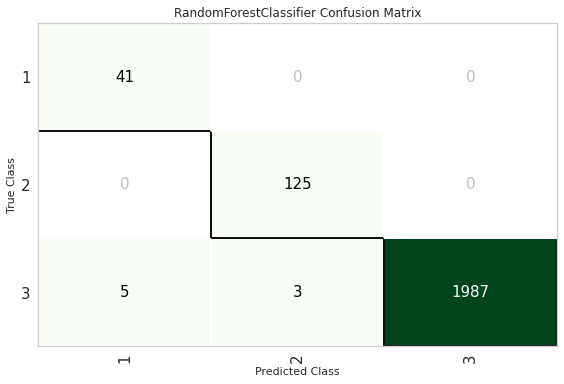

In [13]:
plot_model(tuned_rf, plot = 'confusion_matrix')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


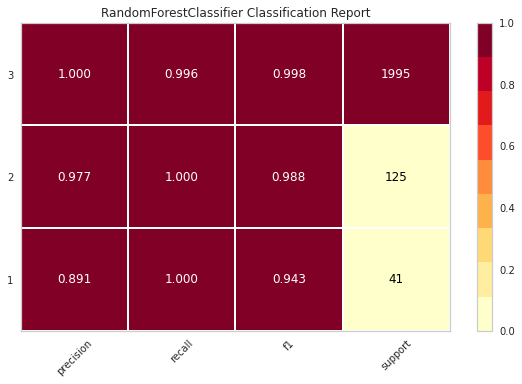

In [14]:
plot_model(tuned_rf, plot = 'class_report')

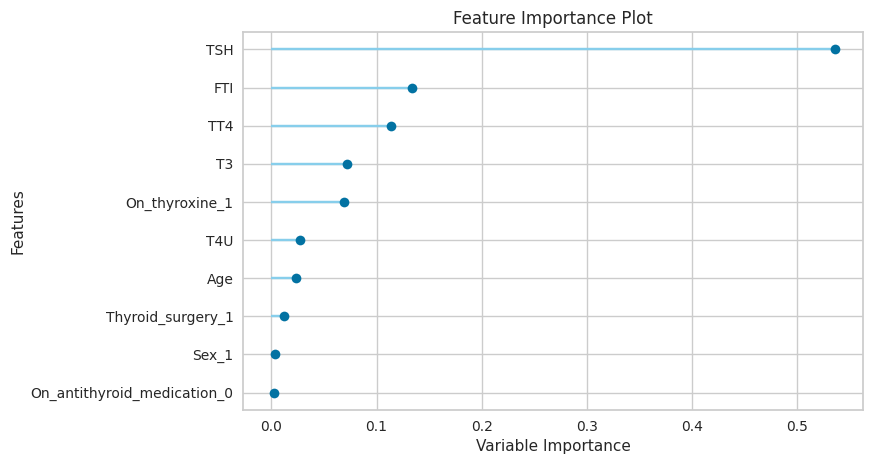

In [15]:
plot_model(rf, plot = 'feature')

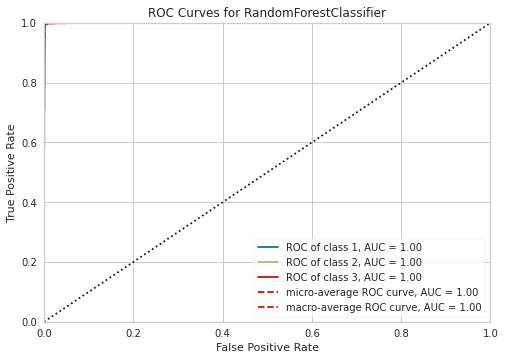

In [16]:
plot_model(rf, plot = "auc")

# *LR*

In [17]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9385,0.8595,0.4722,0.8947,0.9128,0.2350,0.3670
1,0.9286,0.8941,0.3590,0.8861,0.8959,0.0502,0.1610
2,0.9266,0.9108,0.3333,0.8586,0.8913,0.0000,0.0000
3,0.9325,0.7524,0.4103,0.8895,0.9037,0.1436,0.2795
4,0.9286,0.8519,0.3590,0.8861,0.8959,0.0502,0.1610
5,0.9325,0.8039,0.4103,0.8895,0.9037,0.1436,0.2795
6,0.9266,0.8536,0.3333,0.8586,0.8913,0.0000,0.0000
7,0.9325,0.7787,0.4167,0.8875,0.9036,0.1438,0.2799
8,0.9345,0.8623,0.4444,0.8892,0.9069,0.1874,0.3235


In [18]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.8979,0.5826,0.8992,0.9210,0.3784,0.4669
1,0.9444,0.9050,0.5641,0.9000,0.9207,0.3793,0.4870
2,0.9365,0.9422,0.4615,0.8930,0.9102,0.2290,0.3615
3,0.9464,0.7890,0.6147,0.9013,0.9232,0.4353,0.5146
4,0.9444,0.8854,0.5641,0.9000,0.9207,0.3793,0.4870
5,0.9444,0.8510,0.5641,0.9000,0.9207,0.3793,0.4870
6,0.9385,0.8970,0.5000,0.8927,0.9127,0.2692,0.3970
7,0.9385,0.8178,0.5271,0.8914,0.9134,0.2990,0.3990
8,0.9365,0.8966,0.5264,0.8889,0.9116,0.2909,0.3737


In [19]:
print(tuned_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


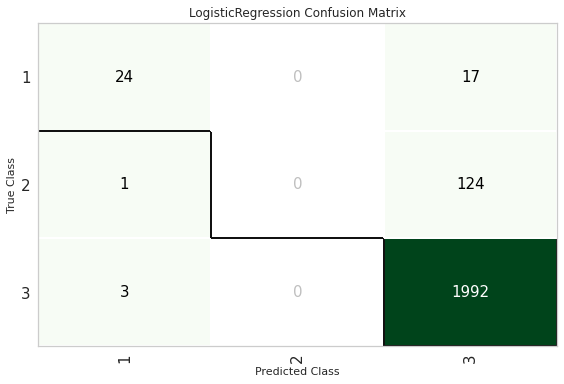

In [20]:
plot_model(tuned_lr, plot = 'confusion_matrix')

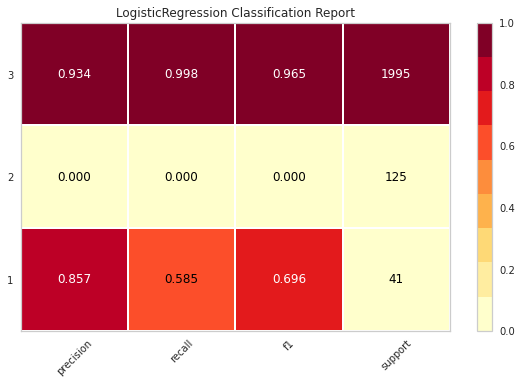

In [21]:
plot_model(tuned_lr, plot = 'class_report')

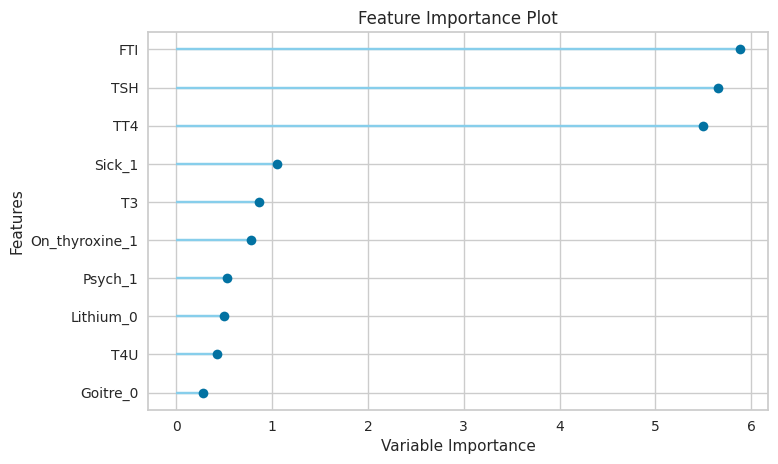

In [22]:
plot_model(lr, plot = 'feature')

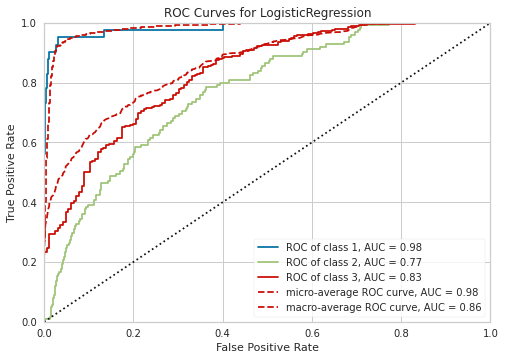

In [23]:
plot_model(lr, plot = "auc")

# *ADA*

In [24]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9901,0.9965,0.9964,0.9918,0.9905,0.9309,0.9333
1,0.9940,0.9970,0.9979,0.9945,0.9942,0.9586,0.9594
2,0.9881,0.9945,0.9957,0.9898,0.9885,0.9201,0.9231
3,0.9960,0.9985,0.9986,0.9963,0.9961,0.9721,0.9724
4,0.9960,0.9985,0.9986,0.9963,0.9961,0.9721,0.9725
5,0.9861,0.9957,0.9950,0.9886,0.9868,0.9079,0.9118
6,0.9861,0.9947,0.9679,0.9884,0.9867,0.9056,0.9078
7,0.9841,0.9951,0.9672,0.9864,0.9847,0.8934,0.8964
8,0.9901,0.9972,0.9694,0.9907,0.9902,0.9309,0.9318


In [25]:
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9901,0.9964,0.9964,0.9918,0.9905,0.9309,0.9333
1,0.9940,0.9970,0.9979,0.9945,0.9942,0.9586,0.9594
2,0.9881,0.9938,0.9957,0.9898,0.9885,0.9201,0.9231
3,0.9940,0.9962,0.9979,0.9947,0.9942,0.9586,0.9594
4,0.9960,0.9986,0.9986,0.9963,0.9961,0.9721,0.9725
5,0.9861,0.9941,0.9950,0.9886,0.9868,0.9079,0.9118
6,0.9881,0.9957,0.9957,0.9904,0.9887,0.9200,0.9231
7,0.9861,0.9939,0.9950,0.9886,0.9867,0.9078,0.9118
8,0.9881,0.9933,0.9957,0.9899,0.9886,0.9201,0.9231


In [26]:
print(tuned_ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123)


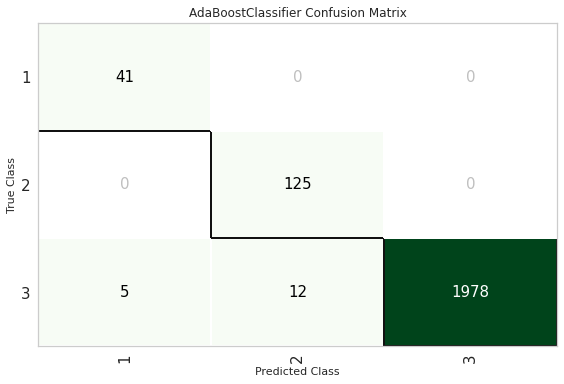

In [27]:
plot_model(tuned_ada, plot = 'confusion_matrix')

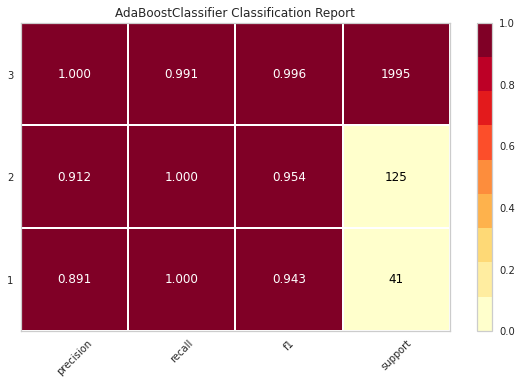

In [28]:
plot_model(tuned_ada, plot = 'class_report')

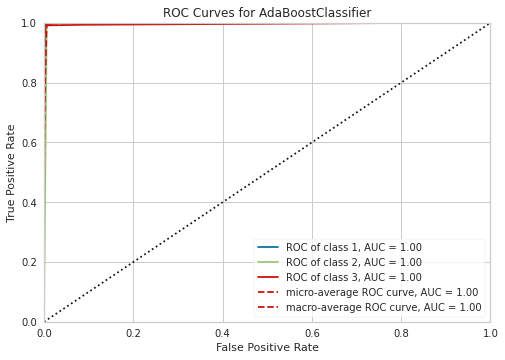

In [29]:
plot_model(ada, plot = "auc")

# *DT*

In [30]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9960,0.9730,0.9605,0.9960,0.9960,0.9706,0.9710
2,0.9940,0.9969,0.9979,0.9945,0.9942,0.9586,0.9594
3,0.9960,0.9855,0.9736,0.9960,0.9960,0.9713,0.9713
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9980,0.9990,0.9993,0.9982,0.9981,0.9859,0.9860
6,0.9940,0.9969,0.9979,0.9947,0.9942,0.9586,0.9594
7,0.9940,0.9720,0.9582,0.9941,0.9940,0.9564,0.9566
8,0.9960,0.9980,0.9986,0.9966,0.9962,0.9721,0.9725


In [31]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9960,0.9999,0.9736,0.9960,0.9960,0.9713,0.9713
2,0.9940,0.9970,0.9979,0.9945,0.9942,0.9586,0.9594
3,0.9960,0.9976,0.9986,0.9963,0.9961,0.9721,0.9724
4,0.9960,1.0000,0.9605,0.9960,0.9960,0.9706,0.9710
5,0.9960,0.9992,0.9986,0.9963,0.9961,0.9721,0.9724
6,0.9940,0.9974,0.9979,0.9947,0.9942,0.9586,0.9594
7,0.9921,0.9848,0.9448,0.9921,0.9920,0.9412,0.9416
8,0.9940,0.9961,0.9979,0.9952,0.9944,0.9586,0.9595


In [32]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


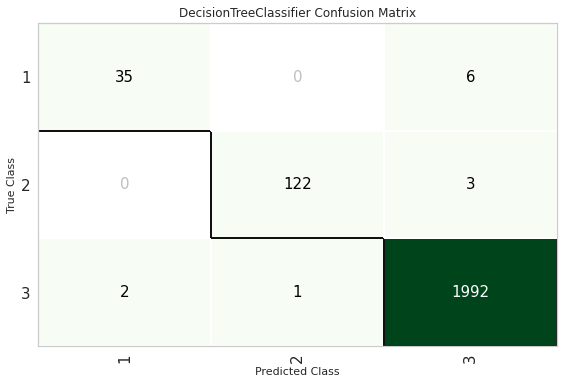

In [33]:
plot_model(tuned_dt, plot = 'confusion_matrix')

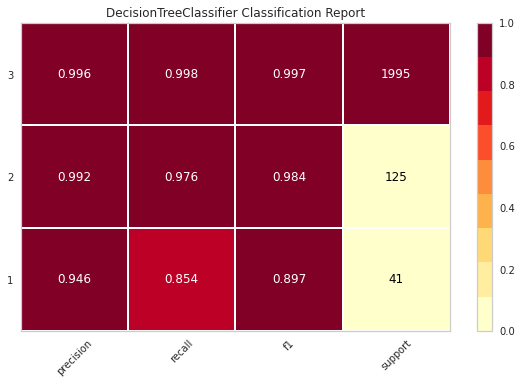

In [34]:
plot_model(tuned_dt, plot = 'class_report')

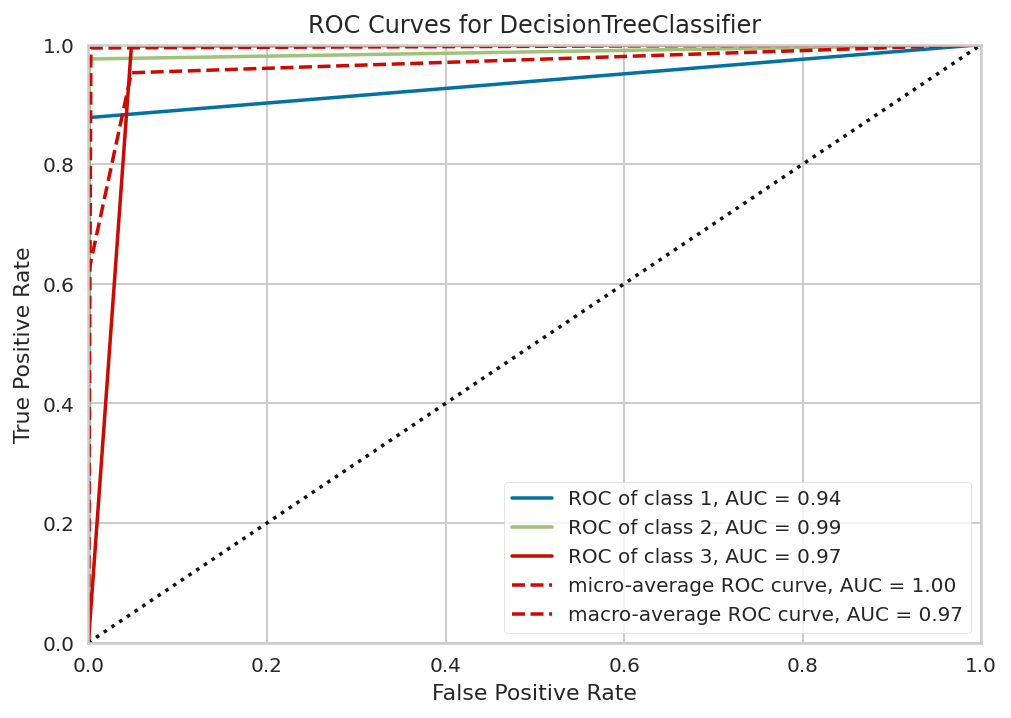

In [35]:
plot_model(dt, plot = "auc", scale=2, use_train_data=False)

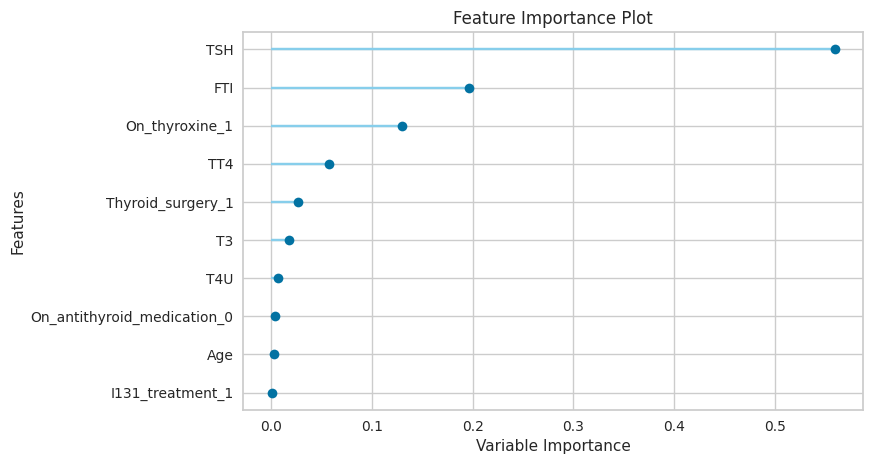

In [36]:
plot_model(dt, plot = 'feature')

In [37]:
best = compare_models(exclude=["rf","dt","lr","ada"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9964,0.9997,0.9882,0.9966,0.9965,0.9745,0.9748,1.4340
gbc,Gradient Boosting Classifier,0.9948,0.9996,0.9838,0.9952,0.9949,0.9636,0.9642,4.1760
et,Extra Trees Classifier,0.9859,0.9985,0.8918,0.9859,0.9852,0.8889,0.8927,4.0450
lda,Linear Discriminant Analysis,0.9387,0.8913,0.5139,0.8929,0.9136,0.2920,0.3928,0.2800
ridge,Ridge Classifier,0.9329,0.0000,0.4189,0.8887,0.9040,0.1489,0.2694,0.0350
svm,SVM - Linear Kernel,0.9284,0.0000,0.3607,0.8685,0.8953,0.0532,0.0880,0.1100
dummy,Dummy Classifier,0.9270,0.5000,0.3333,0.8593,0.8918,0.0000,0.0000,0.0370
knn,K Neighbors Classifier,0.9266,0.6746,0.3703,0.8837,0.8978,0.0941,0.1586,0.0820
nb,Naive Bayes,0.1917,0.8651,0.6599,0.9290,0.2330,0.0427,0.1631,0.0190
qda,Quadratic Discriminant Analysis,0.0248,0.0000,0.3333,0.0006,0.0012,0.0000,0.0000,0.0260


# *GBC*

In [38]:
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9960,1.0000,0.9605,0.9960,0.9960,0.9706,0.9710
2,0.9901,0.9997,0.9964,0.9914,0.9904,0.9326,0.9348
3,0.9940,0.9998,0.9729,0.9941,0.9941,0.9576,0.9577
4,0.9960,0.9999,0.9854,0.9960,0.9960,0.9713,0.9713
5,0.9960,0.9999,0.9986,0.9963,0.9961,0.9721,0.9724
6,0.9901,0.9990,0.9964,0.9917,0.9905,0.9326,0.9348
7,0.9940,0.9978,0.9582,0.9941,0.9940,0.9564,0.9566
8,0.9960,1.0000,0.9986,0.9966,0.9962,0.9721,0.9725


In [39]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9960,1.0000,0.9605,0.9960,0.9960,0.9706,0.9710
2,0.9940,0.9983,0.9979,0.9945,0.9942,0.9586,0.9594
3,0.9940,0.9998,0.9979,0.9947,0.9942,0.9586,0.9594
4,0.9960,0.9999,0.9854,0.9960,0.9960,0.9713,0.9713
5,0.9980,0.9999,0.9993,0.9982,0.9981,0.9859,0.9860
6,0.9921,0.9997,0.9971,0.9932,0.9923,0.9454,0.9469
7,0.9940,0.9995,0.9582,0.9941,0.9940,0.9564,0.9566
8,0.9960,0.9998,0.9986,0.9966,0.9962,0.9721,0.9725


In [40]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


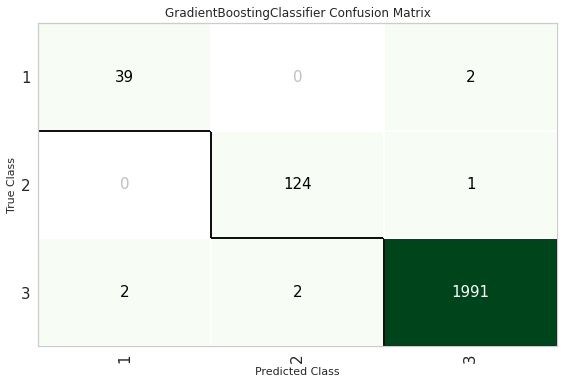

In [41]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

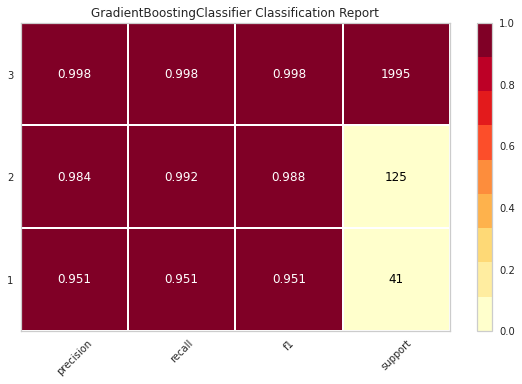

In [42]:
plot_model(tuned_gbc, plot = 'class_report')

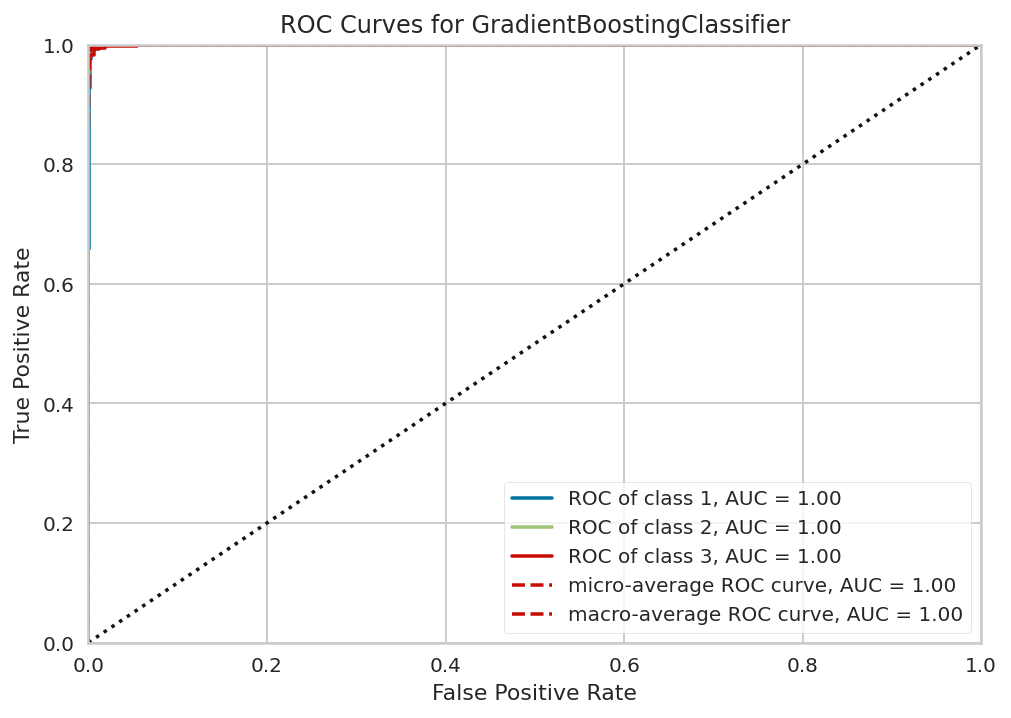

In [43]:
plot_model(gbc, plot = "auc", scale=2, use_train_data=False)

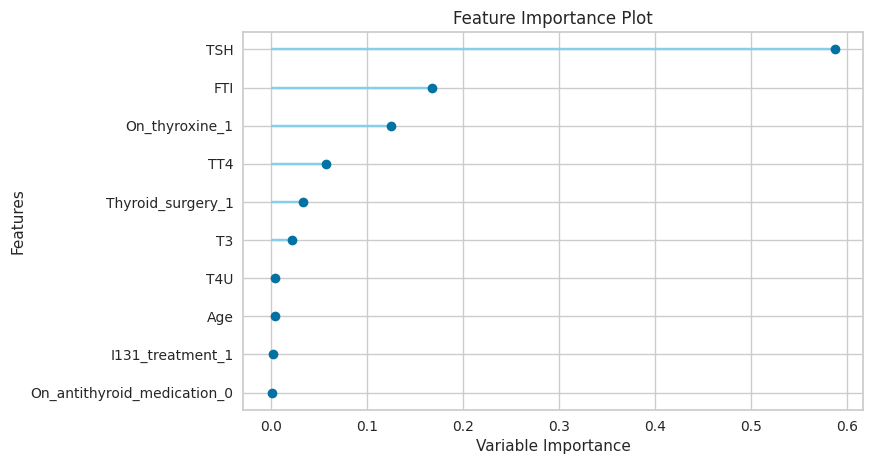

In [44]:
plot_model(gbc, plot = 'feature')

In [45]:
predict_model(tuned_dt);

IndexError: IndexError: index 3 is out of bounds for axis 0 with size 3

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9944,0.9992,0.9427,0.9944,0.9943,0.9608,0.9610


In [97]:
predict_model(tuned_gbc);

In [98]:
predict_model(tuned_rf);

In [102]:
evaluate_model(tuned_gbc)